In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
def mnk(data_x, data_y):
    #Взято с: 
    #https://npm.mipt.ru/books/lab-intro/main.pdf

    # s = np.array([[int(s1[i]), int(s1[i + 1])]for i in range(0, len(s1), 2)])
    s = np.array([[data_x[i], data_y[i]] for i in range(len(data_x))])
    sum_x = np.sum([i[0] for i in s])
    sum_y = np.sum([i[1] for i in s])
    sum_xy = np.sum([i[0] * i[1] for i in s])
    sum_xx = np.sum([i[0] * i[0] for i in s])


    a = ((len(s) * sum_xy) - (sum_x * sum_y)) / ((len(s) * sum_xx) - sum_x ** 2)# коэфициэент при x
    b = (sum_y - (a * sum_x)) / len(s)# свободный член


    y_mean = np.mean(sum_y)
    x_mean = np.mean(sum_x)
    D_yy = np.mean((data_y - y_mean) ** 2)
    D_xx = np.mean((data_x - x_mean) ** 2)
    # print(D_xx, D_yy, a)


    ga = ((1 / (len(s) - 2)) * (np.abs((D_yy / D_xx) - (a ** 2)))) ** (1/2)# погрешности для коэфициэнтов прямой построенной с помощью МНК
    gb = ga * ((np.mean(data_x ** 2)) ** (1 / 2))
    print(ga, gb)

    return a, b

0.09843285410099006 0.05948919060616542
1.4801998731318227


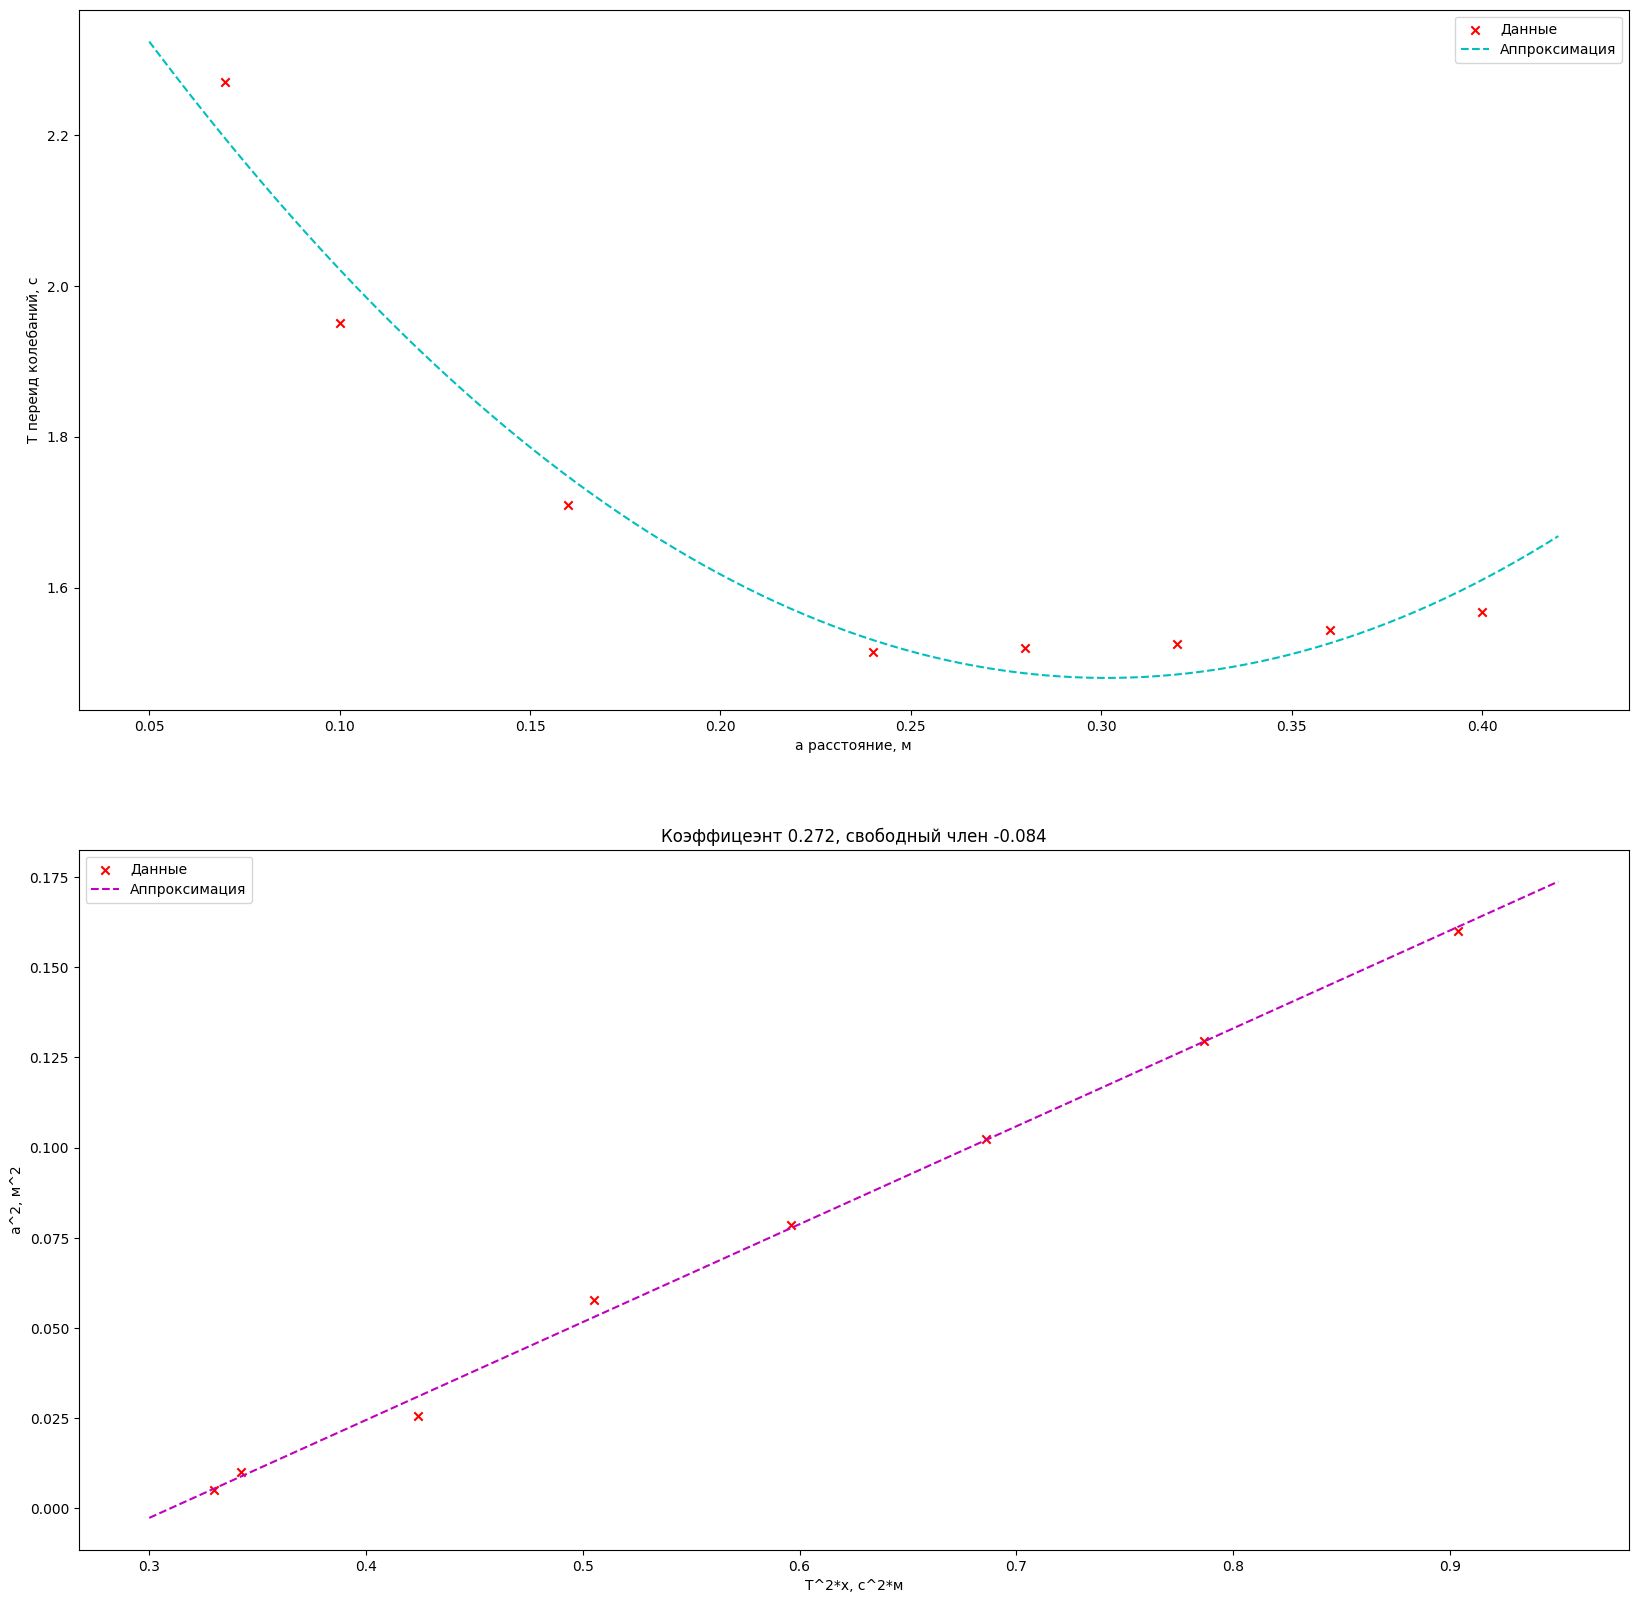

In [105]:
plt.figure(figsize=(20,20))
data_no = np.array([46.8, 47, 47.5, 47.8, 48, 48.5, 49, 49.4])#Центр масс системы
data_no = data_no / 100
data_x = np.array([40, 36, 32, 28, 24, 16, 10, 7])#a из таблицы
data_x = data_x / 100
data_for_x2 = data_x - (0.5 - data_no)#Центр масс для графика
# print(data_for_x2)
data_y = np.array([1.567, 1.544, 1.525, 1.52, 1.515, 1.71, 1.95, 2.27])#Период калебаний (T)


ax1 = plt.subplot2grid((2, 1), (0, 0))
ax2 = plt.subplot2grid((2, 1), (1, 0))
xh = np.linspace(0.05, 0.42, 100)
xh2 = np.linspace(0.3, 0.95, 100)
approximation_1 = np.polyfit(data_x, data_y, 2)
approximation_data_1 = np.poly1d(approximation_1)


data_x2 = data_y ** 2
data_x2 = data_x2 * data_for_x2
data_y2 = data_x ** 2
approximation_2 = np.polyfit(data_x2, data_y2, 1)
approximation_data_2 = np.poly1d(approximation_2)
# print(data_x2)
# print(data_y2)


ax1.scatter(data_x, data_y, marker='x', color='red', label="Данные")
ax1.plot(xh, approximation_data_1(xh),'c--', label="Аппроксимация")
ax1.set_title('')
ax1.set_xlabel('a расстояние, м')
ax1.set_ylabel('T переид колебаний, с')
ax1.legend()


ax2.scatter(data_x2, data_y2, marker='x', color='red', label='Данные')
ax2.plot(xh2, approximation_data_2(xh2),'m--', label="Аппроксимация")
k, b = mnk(data_x2, data_y2)
ax2.set_xlabel('T^2*x, с^2*м')
ax2.set_ylabel('a^2, м^2')
# print(k,b)
ax2.set_title(f'Коэффицеэнт {round(k, 3)}, свободный член {round(b, 3)}')
ax2.legend()

plt.savefig('mygraph.pdf', dpi=1200)

print(approximation_data_1(0.3))